**Importing the Libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

**Loading the dataset**

In [ ]:
data = pd.read_csv("auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# Making the copy of the dataframe
df = data.copy

Dropping the categorical feature from the dataframe for further analysis

In [ ]:
data.drop(['car name'],axis=1,inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


**Summary of the dataset**

In [ ]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


**Data Preprocessing**

1. Checking for null values in the dataset

In [ ]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

* There are** no null values** in our dataset.
But the ** horsepower ** feature in our dataframe contains '?' which need to be removed from the dataframe , so we will **drop the rows **in the dataframe where horsepower is equal to '?'.

In [ ]:
data = data[data.horsepower != '?']

In [ ]:
# Checking for null values after dropping the rows
'?' in data

False

In [ ]:
data.shape

(392, 8)

After dropping the rows containing horsepower as '?', now we are left with 392 rows.

Here , I am checking the correlation of all the features of the dataset w.r.t miles-per-gallon i.e.** 'mpg'** and arranging the values in ascending order.

In [ ]:
data.corr()['mpg'].sort_values()

weight         -0.832244
displacement   -0.805127
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model year      0.580541
mpg             1.000000
Name: mpg, dtype: float64

**Heatmap of correlation matrix**

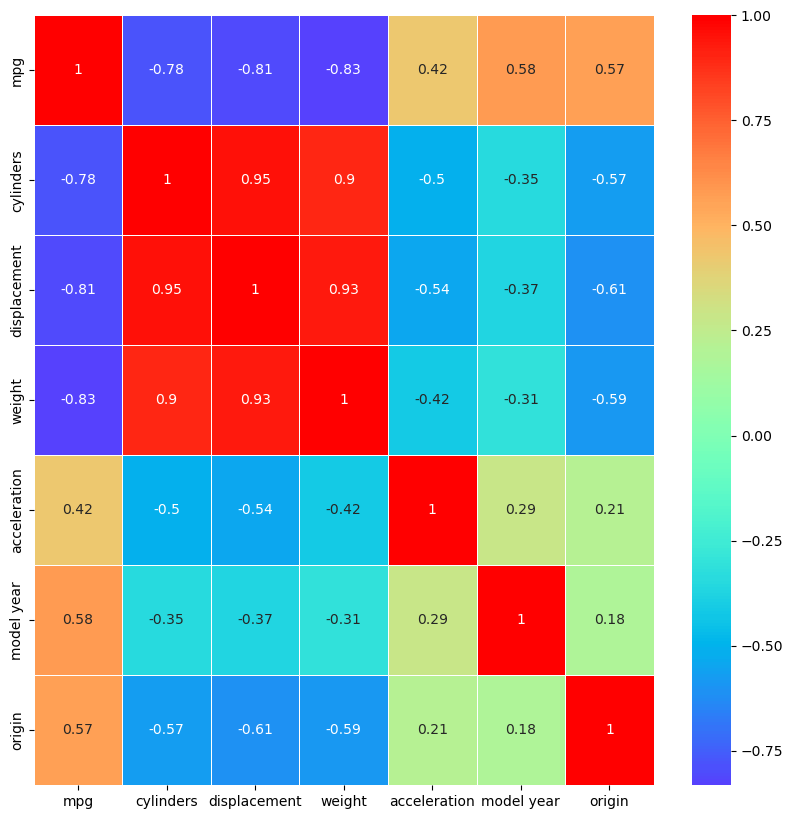

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,center=0,cmap='rainbow')
plt.show()

**Univariate Analysis**

C:\Users\Kaviraj M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


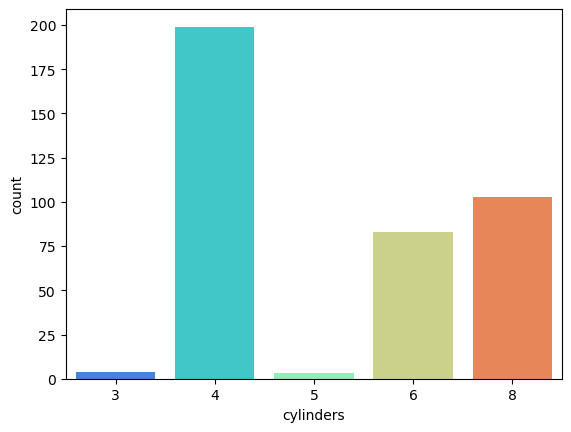

In [ ]:
sns.countplot(data.cylinders,data=data,palette = "rainbow")
plt.show()

From the above above plot we can visualize that there are ** maximum number of 4 cylinder** vehicles.
Around **98% of the vehicles are either of 4, 6, 8 cylinders** and only small percent of vehicles are either  of 3 and 5 cylinders.

C:\Users\Kaviraj M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


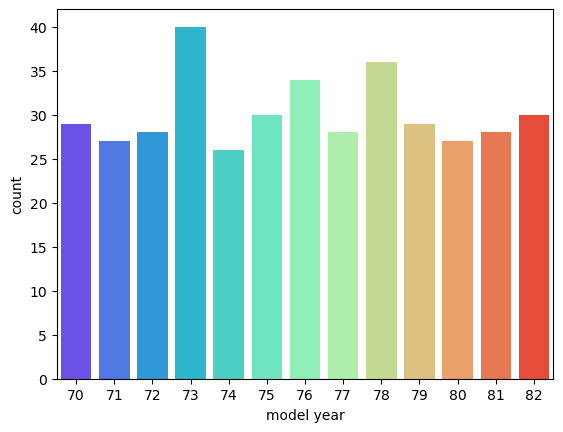

In [ ]:
sns.countplot(data['model year'],palette = "rainbow")
plt.show()

**Maximum number of** vehicles are of the **year 1973** and **minumum number** of the **year 1974**.

C:\Users\Kaviraj M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


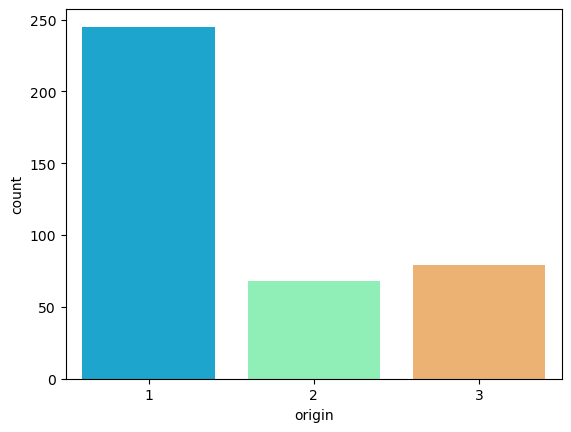

In [ ]:
sns.countplot(data.origin,palette = "rainbow")
plt.show()

Most of the vehicles are from region 1 as compared to the other two regions.

C:\Users\Kaviraj M\AppData\Local\Temp\ipykernel_20256\2646628848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['horsepower'] = pd.to_numeric(data['horsepower'])
C:\Users\Kaviraj M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


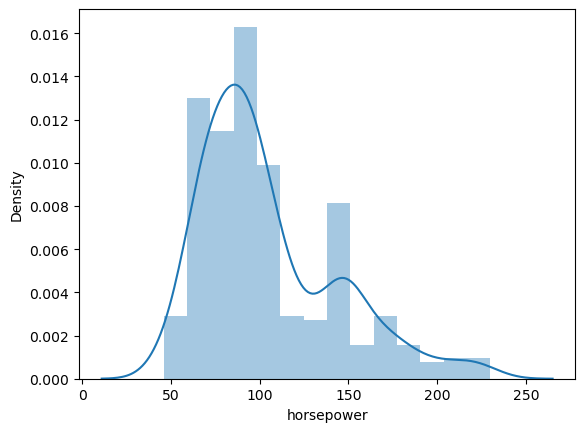

In [ ]:
data['horsepower'] = pd.to_numeric(data['horsepower'])
sns.distplot(data['horsepower'])
plt.show()

1. Horsepower rates the engine performance of cars
2. From the above plot we can see the distribution of the horsepower of the vehicles.
3. We can visualize that most of the vehicles have around** 75-110 horsepower** and only few vehicles have horsepoer above 200.

**Engine displacement** is the swept volume of all the pistons inside the cylinders of a reciprocating engine in a single movement from top dead centre (TDC) to bottom dead centre (BDC).

C:\Users\Kaviraj M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


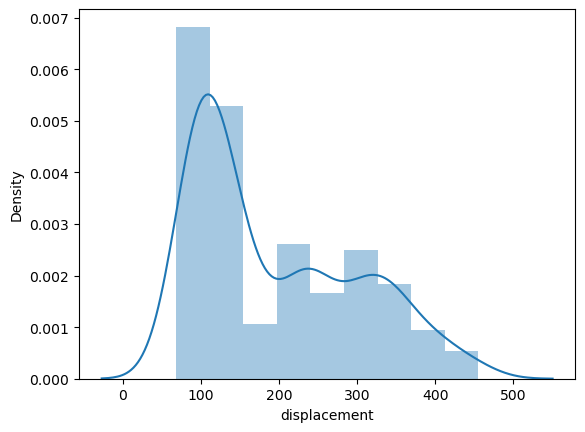

In [ ]:
sns.distplot(data.displacement,rug=False)
plt.show()

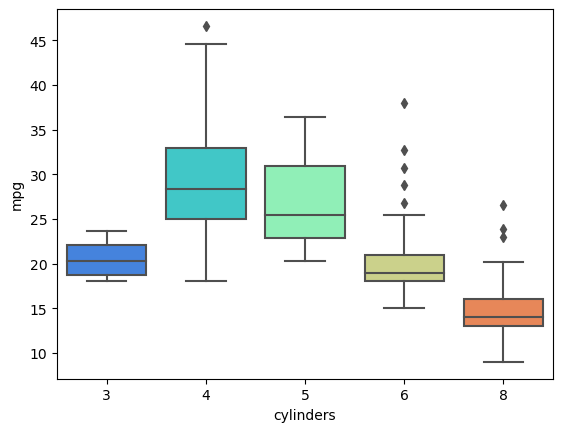

In [ ]:
## multivariate analysis
sns.boxplot(y='mpg',x='cylinders',data=data,palette = "rainbow")
plt.show()

We can easily visualize that the mileage per gallon (mpg) of 4 cylinder vehicles is maximum and we also saw that most of the vehicles are 4 cylinder.
- From the above result we can carry out the inference that for most of the people** mileage(mpg) **is one of the major factor while buying a vehicle.

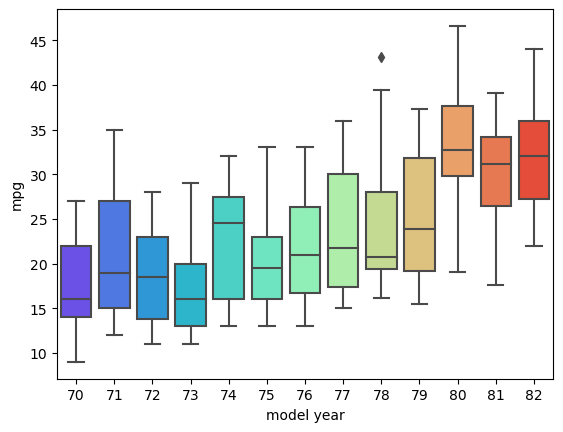

In [ ]:
sns.boxplot(y='mpg',x='model year',data=data,palette = "rainbow")
plt.show()

With every year and with the newer models of the vehicles mileage per gallon (mpg) also increases.

In [ ]:
X = data.iloc[:,1:].values
Y = data.iloc[:,0].values

Splitting the dataset into training and test set.

**1. Multivariate Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred = regressor.predict(X_test)
print(regressor.score(X_test,Y_test))

0.8191428142279117


**Polynomial regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(X_poly,Y,test_size=0.30)

lin_reg = LinearRegression()
lin_reg  = lin_reg.fit(X_train,Y_train)

print(lin_reg.score(X_test,Y_test))

0.7765750858378208
